Dataset Overview:
         Date     Product Region Customer_Type  Quantity  Price  Discount  \
0  2024-07-18      Fruits  North       Regular         6  14.32      0.02   
1  2024-03-16       Dairy   West       Regular         8  33.85      0.02   
2  2024-10-06       Dairy  North       Regular         8  46.22      0.05   
3  2024-09-06  Vegetables  South       Regular         9  47.78      0.19   
4  2024-01-18      Snacks   East           VIP         8  12.93      0.02   

   Revenue  
0    84.20  
1   265.38  
2   351.27  
3   348.32  
4   101.37  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price   

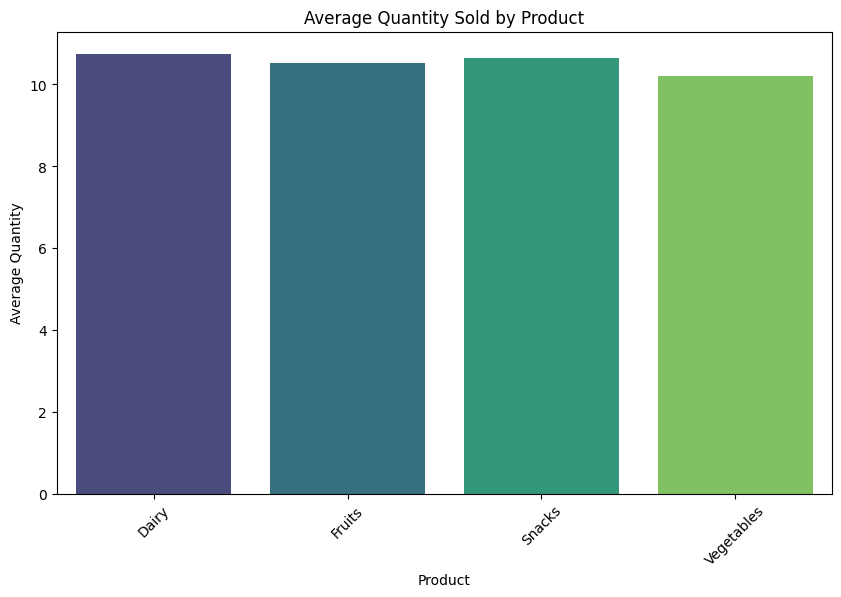

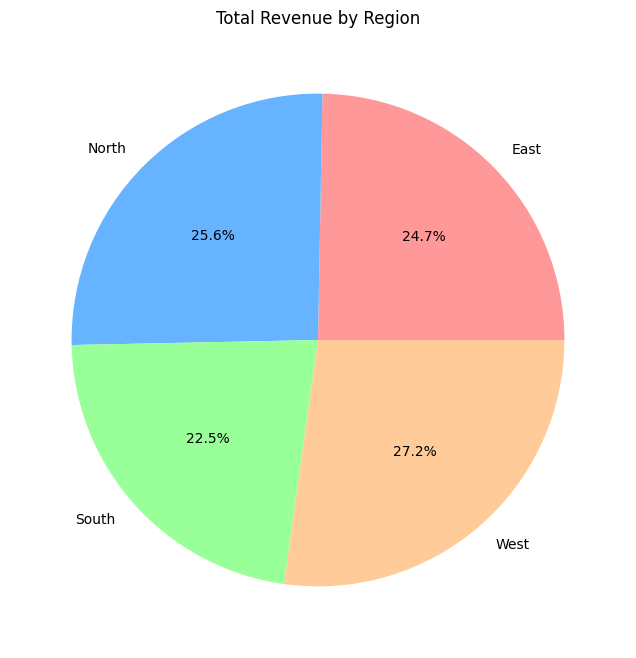

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


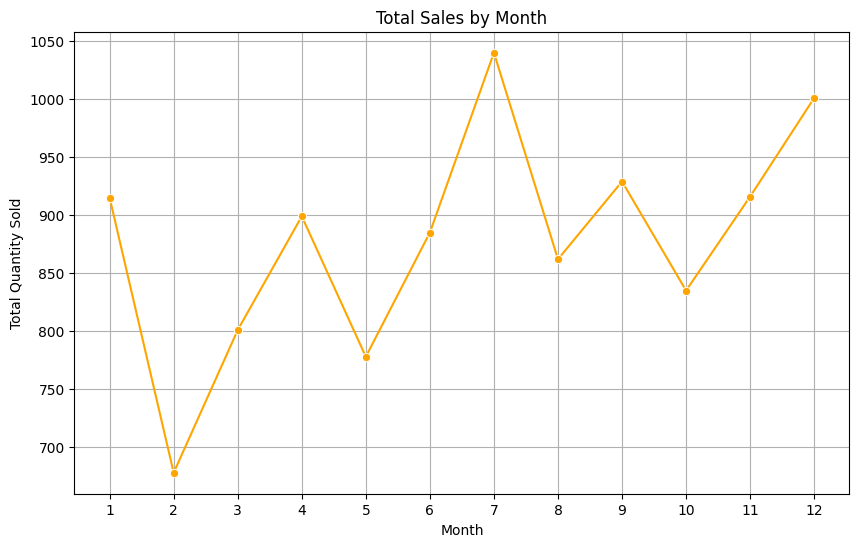


Conclusions:
1. The average quantity sold varies significantly across products, with some products showing higher customer demand.
2. Revenue generation varies by region, indicating potential high-performing and low-performing areas for sales.
3. Monthly sales trends reveal peak periods, which could align with seasonal demand or promotional activities.
4. Addressing missing values and duplicates helped ensure data accuracy and reliability for analysis.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/kaggle/input/my-project/dataset_1_Grocery Store Sales.csv'  

data = pd.read_csv(file_path)


print("Dataset Overview:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nMissing values in each column:")
print(data.isnull().sum())

print("\nSummary Statistics:")
print(data.describe())


print("\nUnique Products:", data['Product'].unique())
print("Unique Regions:", data['Region'].unique())
print("Unique Customer Types:", data['Customer_Type'].unique())


data['Date'] = pd.to_datetime(data['Date'])



data = data.drop_duplicates()

data = data.fillna({
    'Quantity': 0,
    'Revenue': 0,
    'Discount': 0.0
})


quantity_by_product = data.groupby('Product')['Quantity'].mean()


revenue_by_region = data.groupby('Region')['Revenue'].sum()


sales_by_month = data.groupby(data['Date'].dt.month)['Quantity'].sum()


plt.figure(figsize=(10, 6))
sns.barplot(x=quantity_by_product.index, y=quantity_by_product.values, palette="viridis")
plt.title("Average Quantity Sold by Product")
plt.ylabel("Average Quantity")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.show()



colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#8A2BE2']
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_region.values, labels=revenue_by_region.index, autopct='%1.1f%%', colors=colors[:len(revenue_by_region)])
plt.title("Total Revenue by Region")
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker="o", color="orange")
plt.title("Total Sales by Month")
plt.ylabel("Total Quantity Sold")
plt.xlabel("Month")
plt.xticks(ticks=np.arange(1, 13, 1))
plt.grid(True)
plt.show()


print("\nConclusions:")
print("1. The average quantity sold varies significantly across products, with some products showing higher customer demand.")
print("2. Revenue generation varies by region, indicating potential high-performing and low-performing areas for sales.")
print("3. Monthly sales trends reveal peak periods, which could align with seasonal demand or promotional activities.")
print("4. Addressing missing values and duplicates helped ensure data accuracy and reliability for analysis.")
